In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/CustomerChurn_dataset.csv')

In [8]:
df = df.drop('customerID', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [11]:
num_columns = df.select_dtypes(include=['float64','int64']).columns.tolist()

In [12]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


Feature Extraction

In [14]:
X =df.drop('Churn', axis=1)
y = df['Churn']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [17]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
feature_importances = rf_classifier.feature_importances_

In [19]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Extract the top 5 important features
top_5_features = feature_importance_df.head(5)

In [20]:
print(top_5_features)

           Feature  Importance
17  MonthlyCharges    0.176539
4           tenure    0.174955
18    TotalCharges    0.167721
14        Contract    0.081976
16   PaymentMethod    0.051153


Exploratory Data **Analysis**

<ipython-input-21-ab9db1af3873>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Churn', y='MonthlyCharges', data=df, ci=None)


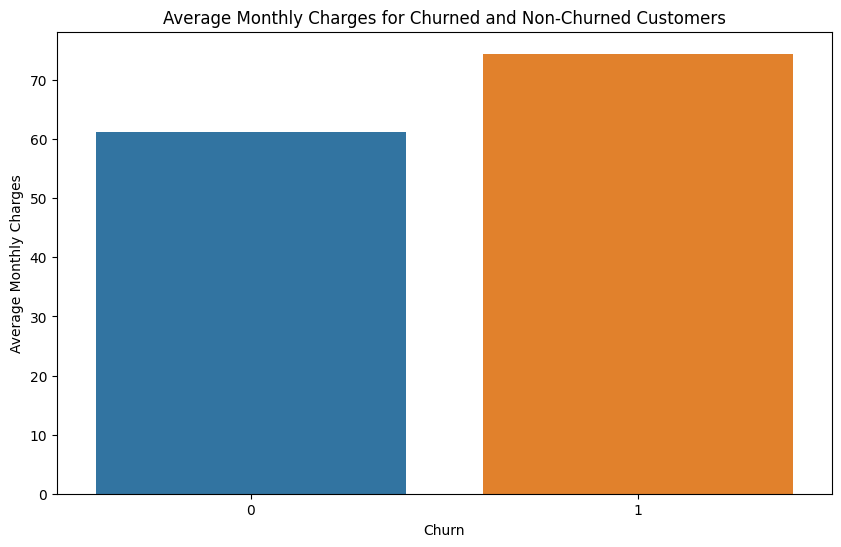

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='MonthlyCharges', data=df, ci=None)
plt.title('Average Monthly Charges for Churned and Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Average Monthly Charges')
plt.show()


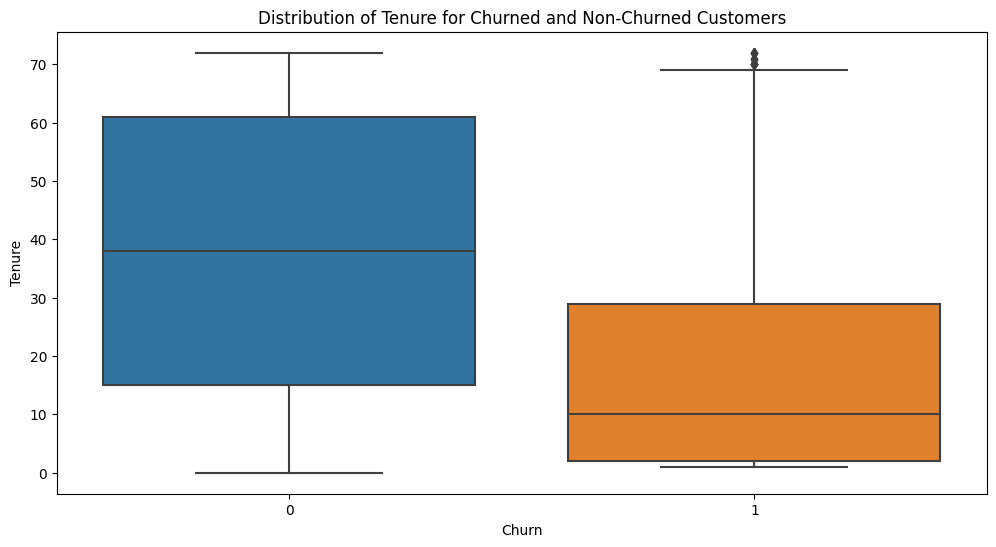

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Distribution of Tenure for Churned and Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

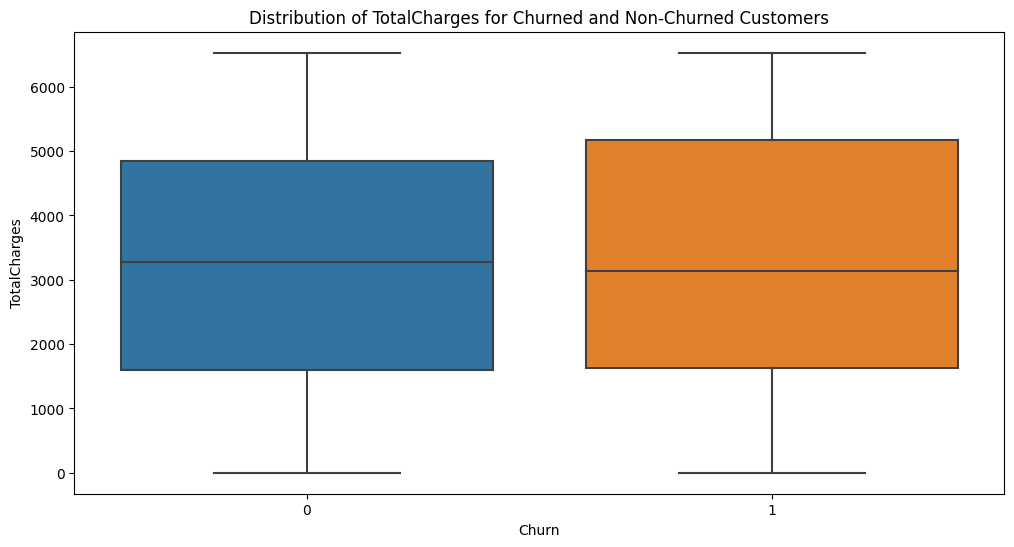

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Distribution of TotalCharges for Churned and Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')
plt.show()


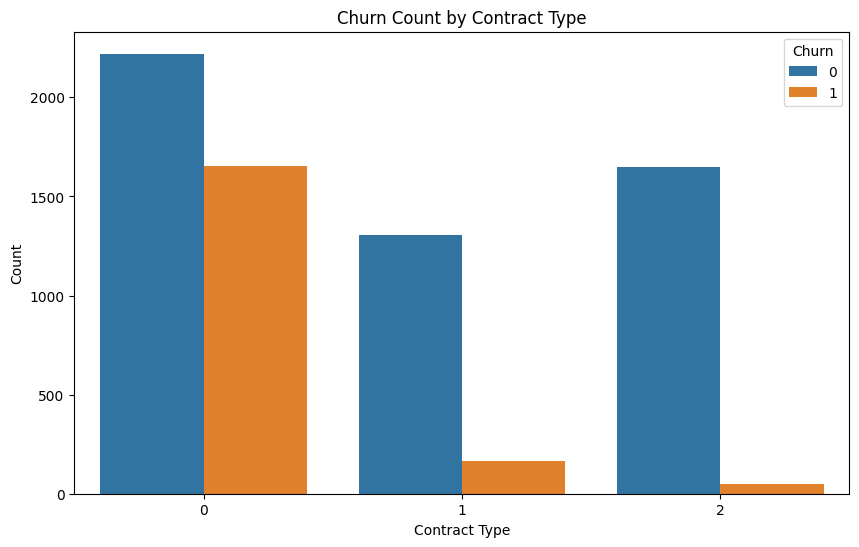

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

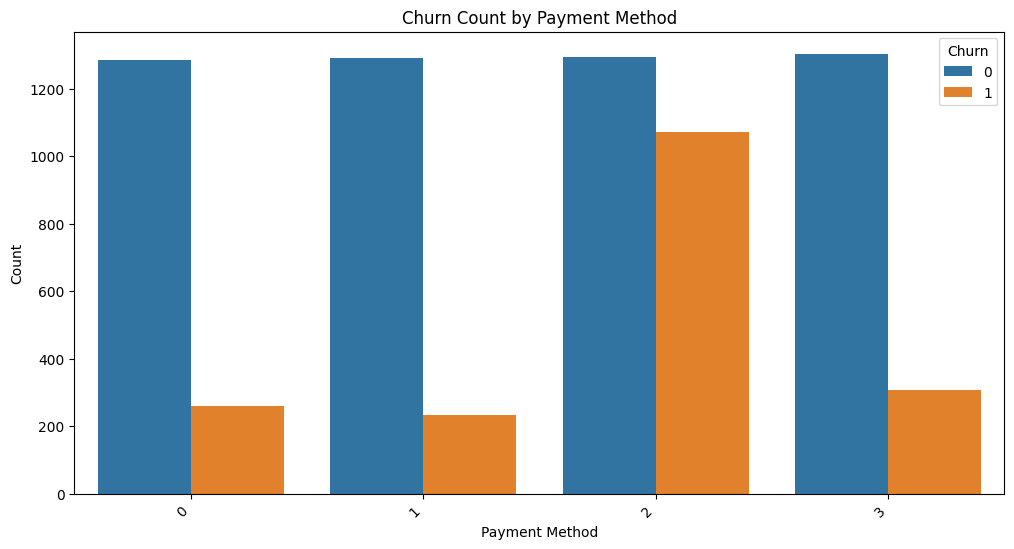

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [26]:
# Assuming df is your DataFrame with the relevant features and target 'Churn'
selected_features = ['MonthlyCharges', 'tenure', 'TotalCharges', 'Contract', 'PaymentMethod']
X = df[selected_features]
y = df['Churn']

# Preprocess categorical features using LabelEncoder
label_encoder = LabelEncoder()
X['Contract'] = label_encoder.fit_transform(X['Contract'])
X['PaymentMethod'] = label_encoder.fit_transform(X['PaymentMethod'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
numeric_features = ['MonthlyCharges', 'tenure', 'TotalCharges']
scaler = StandardScaler()

X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

X_train_categorical = X_train[['Contract', 'PaymentMethod']].values
X_test_categorical = X_test[['Contract', 'PaymentMethod']].values

# Concatenate the preprocessed features
X_train_processed = np.concatenate([X_train_numeric, X_train_categorical], axis=1)
X_test_processed = np.concatenate([X_test_numeric, X_test_categorical], axis=1)

# Build the MLP model using Functional API
input_layer = Input(shape=(X_train_processed.shape[1],))
dense_1 = Dense(64, activation='relu')(input_layer)
dropout_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(32, activation='relu')(dropout_1)
output_layer = Dense(1, activation='sigmoid')(dense_2)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_processed, y_train, epochs=10, batch_size=32, validation_data=(X_test,y_test))
#split=0.2, verbose=2
# Evaluate the model on the test set
y_pred = (model.predict(X_test_processed) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy * 100:.2f}%')

<ipython-input-26-173cdb931fae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Contract'] = label_encoder.fit_transform(X['Contract'])
<ipython-input-26-173cdb931fae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PaymentMethod'] = label_encoder.fit_transform(X['PaymentMethod'])


Epoch 1/10
177/177 [==============================] - 2s 5ms/step - loss: 0.5255 - accuracy: 0.7174 - val_loss: 157.8837 - val_accuracy: 0.7353
Epoch 2/10
177/177 [==============================] - 1s 4ms/step - loss: 0.4594 - accuracy: 0.7675 - val_loss: 107.8286 - val_accuracy: 0.7360
Epoch 3/10
177/177 [==============================] - 1s 4ms/step - loss: 0.4539 - accuracy: 0.7732 - val_loss: 135.3514 - val_accuracy: 0.7381
Epoch 4/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4507 - accuracy: 0.7742 - val_loss: 115.3839 - val_accuracy: 0.7381
Epoch 5/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4506 - accuracy: 0.7758 - val_loss: 129.5651 - val_accuracy: 0.7381
Epoch 6/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4482 - accuracy: 0.7748 - val_loss: 234.7080 - val_accuracy: 0.7374
Epoch 7/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4472 - accuracy: 0.7758 - val_loss: 156.1881 - val_accuracy:

In [27]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier


# Function to create Keras model
def create_model(optimizer='adam', dropout_rate=0.5):
    input_layer = Input(shape=(X_train_processed.shape[1],))
    dense_1 = Dense(64, activation='relu')(input_layer)
    dropout_1 = Dropout(dropout_rate)(dense_1)
    dense_2 = Dense(32, activation='relu')(dropout_1)
    output_layer = Dense(1, activation='sigmoid')(dense_2)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


# Define the parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(32,), (64,), (32, 32), (64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Create the MLPClassifier
mlp = MLPClassifier(max_iter=100)

# Create the GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_processed, y_train)

# Get the best parameters and best model
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test_processed, y_test)

print("Best Parameters:", best_parameters)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (64, 32), 'learning_rate': 'adaptive'}
Test Accuracy: 0.7970191625266146


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
#creating the mlp using the beset parameters from the grid search
import tensorflow as tf
input_layer = Input(shape=(X_train_processed.shape[1],))
dense_1 = Dense(64, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01))(input_layer)
dropout_1 = Dropout(0.01)(dense_1)
dense_2 = Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout_1)
output_layer = Dense(1, activation='sigmoid')(dense_2)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_processed, y_train, epochs=10, batch_size=32, validation_data=(X_test_processed, y_test), verbose=2)

# Evaluate the model on the test set
y_pred = (model.predict(X_test_processed) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
177/177 - 1s - loss: 0.8090 - accuracy: 0.7682 - val_loss: 0.6090 - val_accuracy: 0.7956 - 1s/epoch - 7ms/step
Epoch 2/10
177/177 - 0s - loss: 0.5643 - accuracy: 0.7851 - val_loss: 0.4936 - val_accuracy: 0.7991 - 372ms/epoch - 2ms/step
Epoch 3/10
177/177 - 0s - loss: 0.4969 - accuracy: 0.7867 - val_loss: 0.4608 - val_accuracy: 0.8027 - 361ms/epoch - 2ms/step
Epoch 4/10
177/177 - 0s - loss: 0.4760 - accuracy: 0.7881 - val_loss: 0.4464 - val_accuracy: 0.7991 - 446ms/epoch - 3ms/step
Epoch 5/10
177/177 - 0s - loss: 0.4678 - accuracy: 0.7870 - val_loss: 0.4403 - val_accuracy: 0.7991 - 379ms/epoch - 2ms/step
Epoch 6/10
177/177 - 0s - loss: 0.4629 - accuracy: 0.7858 - val_loss: 0.4362 - val_accuracy: 0.7970 - 377ms/epoch - 2ms/step
Epoch 7/10
177/177 - 0s - loss: 0.4604 - accuracy: 0.7849 - val_loss: 0.4350 - val_accuracy: 0.8013 - 383ms/epoch - 2ms/step
Epoch 8/10
177/177 - 0s - loss: 0.4590 - accuracy: 0.7836 - val_loss: 0.4364 - val_accuracy: 0.7999 - 369ms/epoch - 2ms/step
Epo

In [42]:
y_pred_initial = (model.predict(X_test_processed) > 0.5).astype(int)

accuracy_initial = accuracy_score(y_test, y_pred_initial)
auc_initial = roc_auc_score(y_test, model.predict(X_test_processed))

print(f'Initial model - Test Accuracy: {accuracy_initial * 100:.2f}%')
print(f'Initial model - AUC Score: {auc_initial:.4f}')

45/45 [==============================] - 0s 2ms/step
Initial model - Test Accuracy: 79.63%
Initial model - AUC Score: 0.8473


In [43]:
# Save the model to a file
model.save("Churning_Customers.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
